In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG16

### Load Dataset

In [10]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [11]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0



In [12]:
print("Shape of x_train :",X_train.shape)
print("Shape of Y_train :",Y_train.shape)
print("Shape of x_test :",X_test.shape)
print("Shape of y_test :",Y_test.shape)

Shape of x_train : (2000, 100, 100, 3)
Shape of Y_train : (2000, 1)
Shape of x_test : (400, 100, 100, 3)
Shape of y_test : (400, 1)


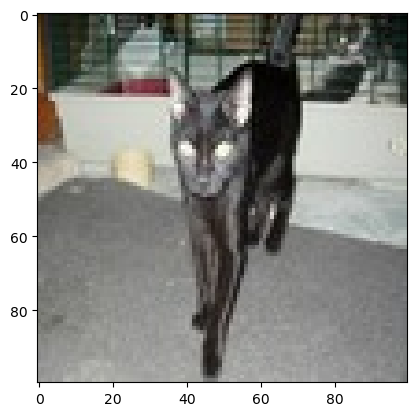

In [15]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

## Model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# 2. Building the full model
model = Sequential()
model.add(base_model)  # Pretrained VGG16 model
model.add(Flatten())

# 3. Add fully connected layers with Dropout and Batch Normalization
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Normalize after fully connected layer
model.add(Dropout(0.5))  # Prevent overfitting

model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer

# 4. Compile the model with a lower learning rate for finer updates
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 5. overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('model.keras', save_best_only=True)

# 6. Data augmentation for better generalization
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)  # Augment training data

# 7. Train the model with data augmentation and early stopping
model.fit(
    datagen.flow(X_train, Y_train, batch_size=64),
    validation_data=(X_test, Y_test),
    epochs=15,
    callbacks=[early_stopping, model_checkpoint]
)

# 8. Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

#9.accuracy print the data.

y_pred = model.predict(X_test)

y_pred = y_pred > 0.5

accuracy = accuracy_score(Y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Epoch 1/15


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.6078 - loss: 0.7790 - val_accuracy: 0.5000 - val_loss: 2.1094
Epoch 2/15
